<a href="https://colab.research.google.com/github/Gefte/Bitcoin-Volatility-Analysis-and-Price-Prediction/blob/main/Garch_e_ARCH_Predict_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Libs

In [16]:
!pip install arch
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Code

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [26]:
df_btc = pd.read_csv('/content/BTC-USD.csv')

In [27]:
df_btc.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
5,2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500
6,2016-01-07,430.010986,458.765991,429.076996,458.048004,458.048004,87562200
7,2016-01-08,457.537994,462.933990,447.937988,453.230011,453.230011,56993000
8,2016-01-09,453.382996,454.640015,446.889008,447.610992,447.610992,32278000
9,2016-01-10,448.238007,448.308990,440.351013,447.990997,447.990997,35995900



## GARCH (1,1) -  ARCH (1)


In [28]:

df = df_btc.sort_values(by='Date').reset_index(drop=True)


df['Returns'] = df['Close'].pct_change().dropna()

df = df.dropna()


garch_model = arch_model(df['Returns'], vol='Garch', p=1, q=1, dist='Normal')
garch_results = garch_model.fit(disp='off')


arch_model = arch_model(df['Returns'], vol='Arch', p=1, dist='Normal')
arch_results = arch_model.fit(disp='off')


/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001478. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001478. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [29]:
print("GARCH(1,1) Results:\n", garch_results.summary())

GARCH(1,1) Results:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5089.43
Distribution:                  Normal   AIC:                          -10170.9
Method:            Maximum Likelihood   BIC:                          -10147.3
                                        No. Observations:                 2662
Date:                Mon, Apr 17 2023   Df Residuals:                     2661
Time:                        00:36:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.2868e-03  7.258e-04     

O modelo GARCH (1,1) é uma extensão do modelo ARCH (1) que foi projetado para capturar a volatilidade condicional (isto é, a volatilidade que depende das observações passadas) nos retornos de ativos financeiros. O modelo GARCH (1,1) é uma ferramenta útil para modelar a volatilidade nos retornos do Bitcoin, já que essa criptomoeda é conhecida por sua alta volatilidade.

A média (mu) da série de retornos do Bitcoin é de aproximadamente 0,0023 (ou 0,23%). Essa média indica o retorno médio diário esperado para o Bitcoin durante o período de tempo analisado. A média constante no modelo implica que o retorno médio não varia com o tempo.

A equação de volatilidade para o modelo GARCH (1,1) é a seguinte:

# $$h_t = omega + alpha * r_{t-1}^2 + beta * h_{t-1}$$

No nosso caso, os coeficientes estimados para a série de retornos do Bitcoin são:

*   média (mu): 0,0022868
*   omega (ω): 0,000029566
*   alpha[1] (α1): 0,1000
*   beta[1] (β1): 0,8800

A média (mu) indica que, em média, os retornos diários do Bitcoin são de aproximadamente 0,23%. A média pode ser usada como uma estimativa simples do retorno esperado em um único dia.

O parâmetro omega (ω) representa a parte constante da volatilidade condicional. Neste caso, é um valor pequeno (0,000029566), sugerindo que a volatilidade incondicional é baixa.

O coeficiente alpha[1] (α1) mede a influência dos retornos passados ao quadrado sobre a volatilidade atual. Neste caso, é de 0,1000, indicando que os retornos passados têm um impacto moderado na volatilidade atual.

O coeficiente beta[1] (β1) mede a influência da volatilidade passada sobre a volatilidade atual. Neste caso, é de 0,8800, o que sugere que a volatilidade passada tem uma influência significativa na volatilidade atual. A soma de alpha[1] e beta[1] é próxima de 1, indicando uma alta persistência da volatilidade ao longo do tempo.

A equação estimada de volatilidade condicional para a série de retornos do Bitcoin pode ser escrita como:


# $$h_t = 0.000029566 + 0.1000 * r_{t-1}^2 + 0.8800 * h_{t-1}$$

Esta equação nos permite prever a volatilidade condicional futura da série de retornos do Bitcoin com base nos retornos passados e na volatilidade passada.



In [30]:
print("\nARCH(1) Results:\n", arch_results.summary())


ARCH(1) Results:
                       Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                4947.40
Distribution:                  Normal   AIC:                          -9888.80
Method:            Maximum Likelihood   BIC:                          -9871.14
                                        No. Observations:                 2662
Date:                Mon, Apr 17 2023   Df Residuals:                     2661
Time:                        00:36:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.5372e-03  7.163e-04      3

### **Modelo de média constante - Resultados do modelo ARCH:**

O modelo empregado é um modelo de média constante (Constant Mean) com um modelo de volatilidade ARCH (1) para os resíduos. O método utilizado para estimar os parâmetros é a Máxima Verossimilhança.

#### **Modelo de média:**

A média (mu) da série de retornos do Bitcoin é de aproximadamente 0,0025 (ou 0,25%). Essa média indica o retorno esperado em média para a série de preços do Bitcoin.

# $$mu = 0,0025372$$

#### **Modelo de volatilidade:**

O modelo ARCH (1) estima a volatilidade condicional a partir do quadrado dos resíduos defasados. A equação de volatilidade para o modelo ARCH (1) é a seguinte:

# $$h_t = omega + alpha * r_{t-1}^2\$$

Os parâmetros estimados do modelo ARCH (1) são:
*   omega (ω): 0,0012546
*   alpha[1] (α1): 0,1524

A equação estimada de volatilidade condicional para a série de retornos do Bitcoin é:

# $$h_t = 0,0012546 + 0,1524 * r_{t-1}^2$$

O parâmetro ω (omega) indica o nível base da volatilidade, enquanto o parâmetro α1 (alpha[1]) mostra a persistência da volatilidade. Um valor maior de α1 indica que os choques na volatilidade persistem por mais tempo. Neste caso, o valor de α1 é de 0,1524, o que indica uma persistência moderada da volatilidade na série de retornos do Bitcoin.

Os valores p para os parâmetros estimados são inferiores a 0,05, indicando que os coeficientes são estatisticamente significativos. Isso sugere que o modelo ARCH (1) é adequado para modelar a volatilidade condicional na série de retornos do Bitcoin.

Em resumo, o modelo ARCH (1) captura a volatilidade nos retornos do Bitcoin e mostra que há uma persistência moderada na volatilidade. Essa informação pode ser útil para gerenciar riscos e tomar decisões de investimento em relação ao Bitcoin.

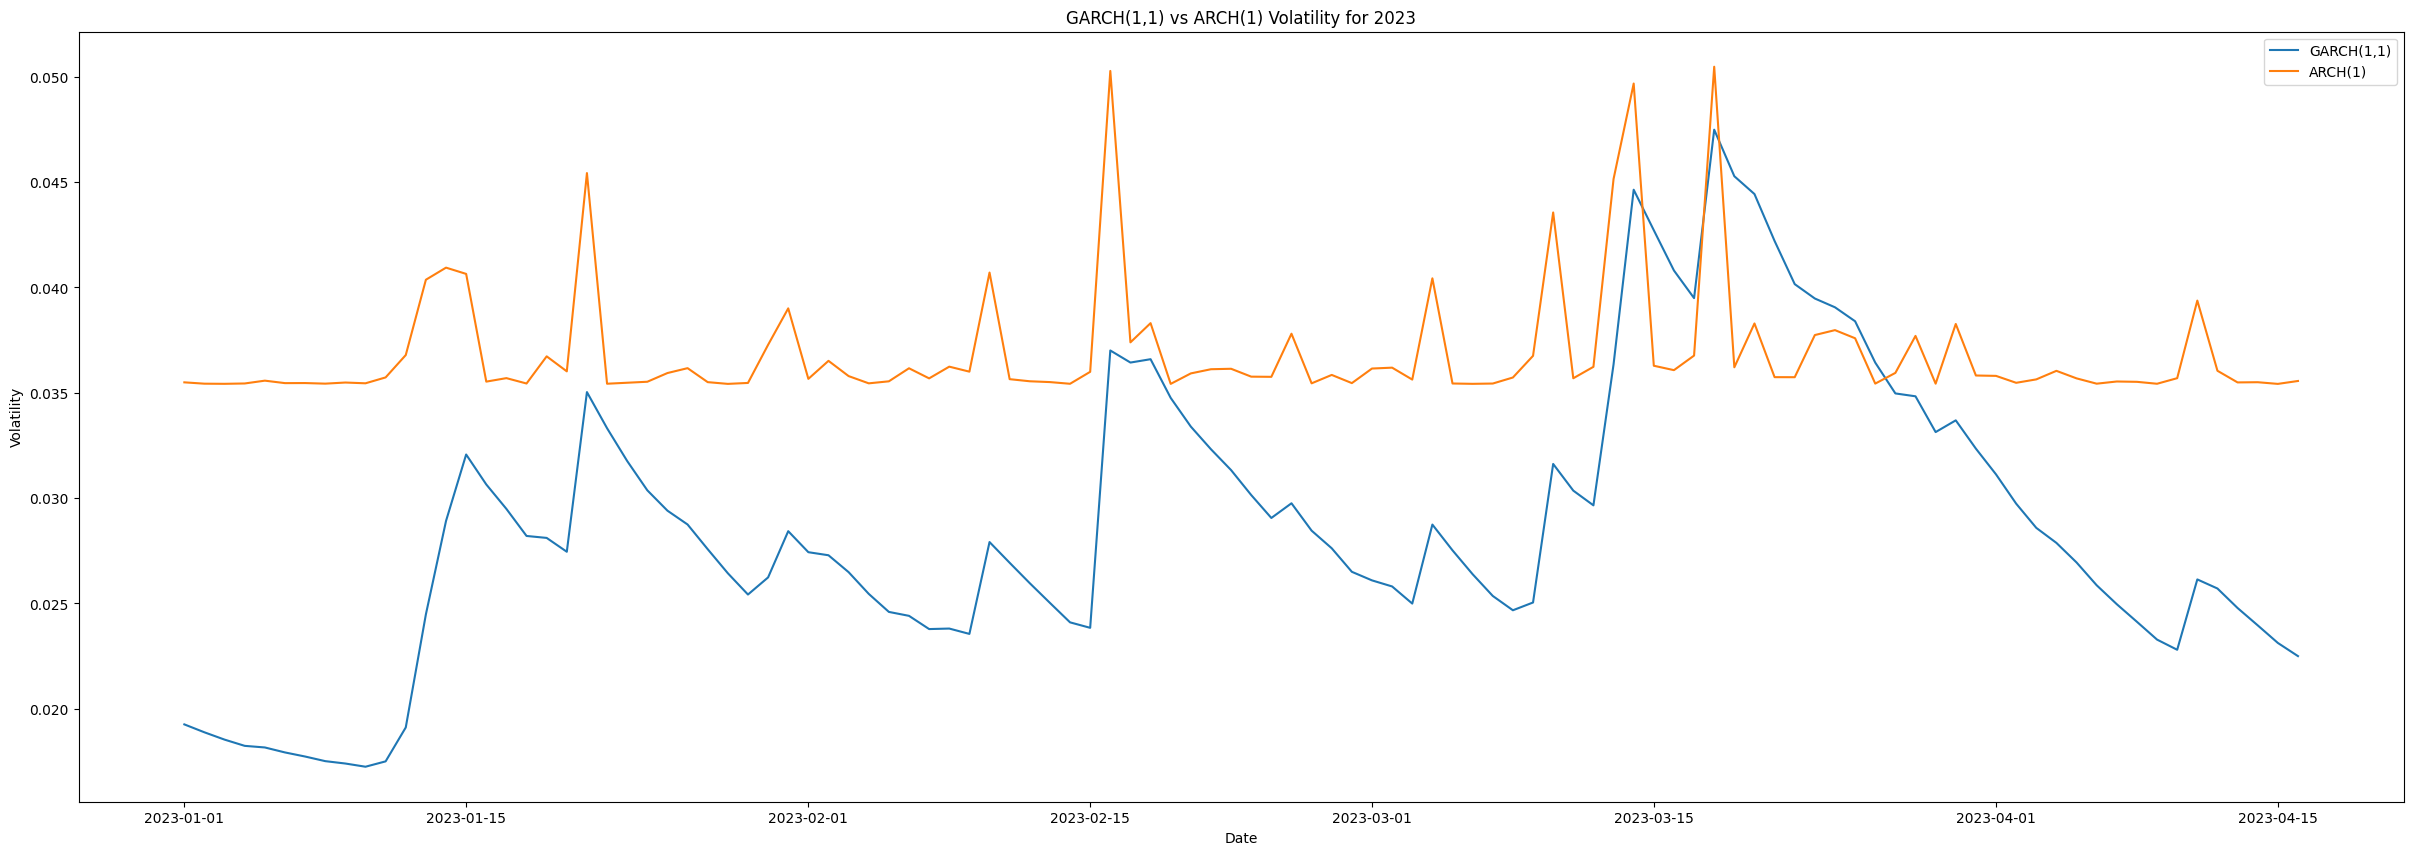

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df_2023 = df[df['Date'].dt.year == 2023]
index_2023 = df_2023.index
plt.figure(figsize=(30,10))
plt.plot(df_2023['Date'], garch_results.conditional_volatility[index_2023], label='GARCH(1,1)')
plt.plot(df_2023['Date'], arch_results.conditional_volatility[index_2023], label='ARCH(1)')
plt.legend(loc='upper right')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("GARCH(1,1) vs ARCH(1) Volatility for 2023")
plt.show()


In [34]:
def calculate_rsi(data, period=14):
    delta = data.diff().dropna()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

O Índice de Força Relativa (RSI, do inglês Relative Strength Index) é um indicador técnico que mede a velocidade e a mudança de movimentos de preços. O RSI varia de 0 a 100 e é usado para identificar condições de sobrecompra ou sobrevenda no mercado.

A fórmula para calcular o RSI é a seguinte:

$$
RSI = 100 - \frac{100}{1 + RS}
$$

Onde:

$RS$ é a razão média dos ganhos e perdas nos últimos $n$ períodos.
O cálculo do $RS$ pode ser dividido em duas etapas:

1.   Calcular as médias dos ganhos e perdas:
      $$
      \text{Média de Ganhos} = \frac{\sum_{i=1}^{n} G_i}{n}
      $$
      $$
      \text{Média de Perdas} = \frac{\sum_{i=1}^{n} P_i}{n}
      $$
      Onde:
      * $G_i$ é o ganho no período $i$ (se houver uma perda, o valor é 0)
      * $P_i$ é a perda no período $i$ (se houver um ganho, o valor é 0)
      * $n$ é o número de períodos considerados (geralmente 14)

2.   Calcular a razão média dos ganhos e perdas ($RS$):

    $$
    RS = \frac{\text{Média de Ganhos}}{\text{Média de Perdas}}
    $$

  Com o valor de $RS$, podemos calcular o RSI usando a primeira fórmula apresentada. O RSI é útil para identificar condições de sobrecompra (valores acima de 70) e sobrevenda (valores abaixo de 30) no mercado.


In [41]:
data = df_btc.copy()
data['RSI'] = calculate_rsi(data['Close'])
data = data.dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data[['Close', 'RSI']].values)
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

As redes LSTM (Long Short-Term Memory) são uma arquitetura de rede neural recorrente (RNN) projetada para lidar com problemas de dependências temporais de longo prazo. As RNNs tradicionais têm dificuldade em aprender padrões em sequências com intervalos de tempo longos devido ao problema do desaparecimento do gradiente. As LSTMs, por outro lado, são capazes de manter informações relevantes por mais tempo e descartar informações irrelevantes, o que permite uma melhor aprendizagem de sequências temporais.

A estrutura central de uma célula LSTM é composta por uma célula de memória, denotada por "C", e três portas: a porta de entrada (input gate), a porta de esquecimento (forget gate) e a porta de saída (output gate). Essas portas são responsáveis por regular o fluxo de informações dentro da célula LSTM.

Aqui estão as fórmulas matemáticas para as operações realizadas dentro de uma célula LSTM:
* Forget gate (f_t):
#  $$f_t = σ(W_f * [h_(t-1), x_t] + b_f)$$

* Input gate (i_t):
# $$i_t = σ(W_i * [h_(t-1), x_t] + b_i)$$

* Candidate cell state (C~_t):
# $$C~t = tanh(W_C * [h(t-1), x_t] + b_C)$$

* Update cell state (C_t):
# $$C_t = f_t * C_(t-1) + i_t * C~_t$$

* Output gate (o_t):
# $$o_t = σ(W_o * [h_(t-1), x_t] + b_o)$$

* Update hidden state (h_t):
# $$h_t = o_t * tanh(C_t)$$

Nestas fórmulas:

* σ é a função de ativação sigmoide
* tanh é a função de ativação tangente hiperbólica
* x_t é a entrada no tempo t
* h_(t-1) é o estado oculto no tempo t-1
* C_(t-1) é o estado da célula no tempo t-1
* W_i, W_f, W_C, e W_o são as matrizes de pesos para as portas de entrada, esquecimento, candidata e saída, respectivamente
* b_i, b_f, b_C, e b_o são os vetores de bias para as portas de entrada, esquecimento, candidata e saída, respectivamente

As matrizes de peso e os vetores de bias são parâmetros aprendidos durante o treinamento da rede LSTM.

As LSTMs são uma poderosa ferramenta para modelar sequências temporais em várias aplicações, como previsão de séries temporais, processamento de linguagem natural, análise de sentimentos e geração de texto. Ao lidar com a dependência de longo prazo em sequências temporais, as LSTMs superam as RNNs tradicionais e outras técnicas de aprendizado profundo.

In [42]:
def create_dataset(dataset, window=1):
    X, Y = [], []
    for i in range(len(dataset) - window):
        X.append(dataset[i:(i + window)])
        Y.append(dataset[i + window, 0])  
    return np.array(X), np.array(Y)

window_size = 5
X_train, Y_train = create_dataset(train_data, window_size)
X_test, Y_test = create_dataset(test_data, window_size)
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2114/2114 - 5s - loss: 0.0021 - 5s/epoch - 2ms/step
Epoch 2/100
2114/2114 - 4s - loss: 4.9908e-04 - 4s/epoch - 2ms/step
Epoch 3/100
2114/2114 - 4s - loss: 5.0930e-04 - 4s/epoch - 2ms/step
Epoch 4/100
2114/2114 - 4s - loss: 3.7773e-04 - 4s/epoch - 2ms/step
Epoch 5/100
2114/2114 - 4s - loss: 3.5222e-04 - 4s/epoch - 2ms/step
Epoch 6/100
2114/2114 - 4s - loss: 3.1777e-04 - 4s/epoch - 2ms/step
Epoch 7/100
2114/2114 - 5s - loss: 3.0338e-04 - 5s/epoch - 3ms/step
Epoch 8/100
2114/2114 - 5s - loss: 2.6953e-04 - 5s/epoch - 3ms/step
Epoch 9/100
2114/2114 - 5s - loss: 2.6698e-04 - 5s/epoch - 2ms/step
Epoch 10/100
2114/2114 - 4s - loss: 2.5339e-04 - 4s/epoch - 2ms/step
Epoch 11/100
2114/2114 - 4s - loss: 2.6129e-04 - 4s/epoch - 2ms/step
Epoch 12/100
2114/2114 - 4s - loss: 2.2423e-04 - 4s/epoch - 2ms/step
Epoch 13/100
2114/2114 - 4s - loss: 2.4438e-04 - 4s/epoch - 2ms/step
Epoch 14/100
2114/2114 - 4s - loss: 2.2917e-04 - 4s/epoch - 2ms/step
Epoch 15/100
2114/2114 - 4s - loss: 2.0832e-04 

In [45]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(np.column_stack((train_predict, X_train[:, -1, 1])))
test_predict = scaler.inverse_transform(np.column_stack((test_predict, X_test[:, -1, 1])))
train_error = np.sqrt(mean_squared_error(Y_train, train_predict[:, 0]))
test_error = np.sqrt(mean_squared_error(Y_test, test_predict[:, 0]))
print(f'Train error: {train_error:.2f}')
print(f'Test error: {test_error:.2f}')

17/17 [==============================] - 0s 2ms/step
Train error: 19257.24
Test error: 32410.09


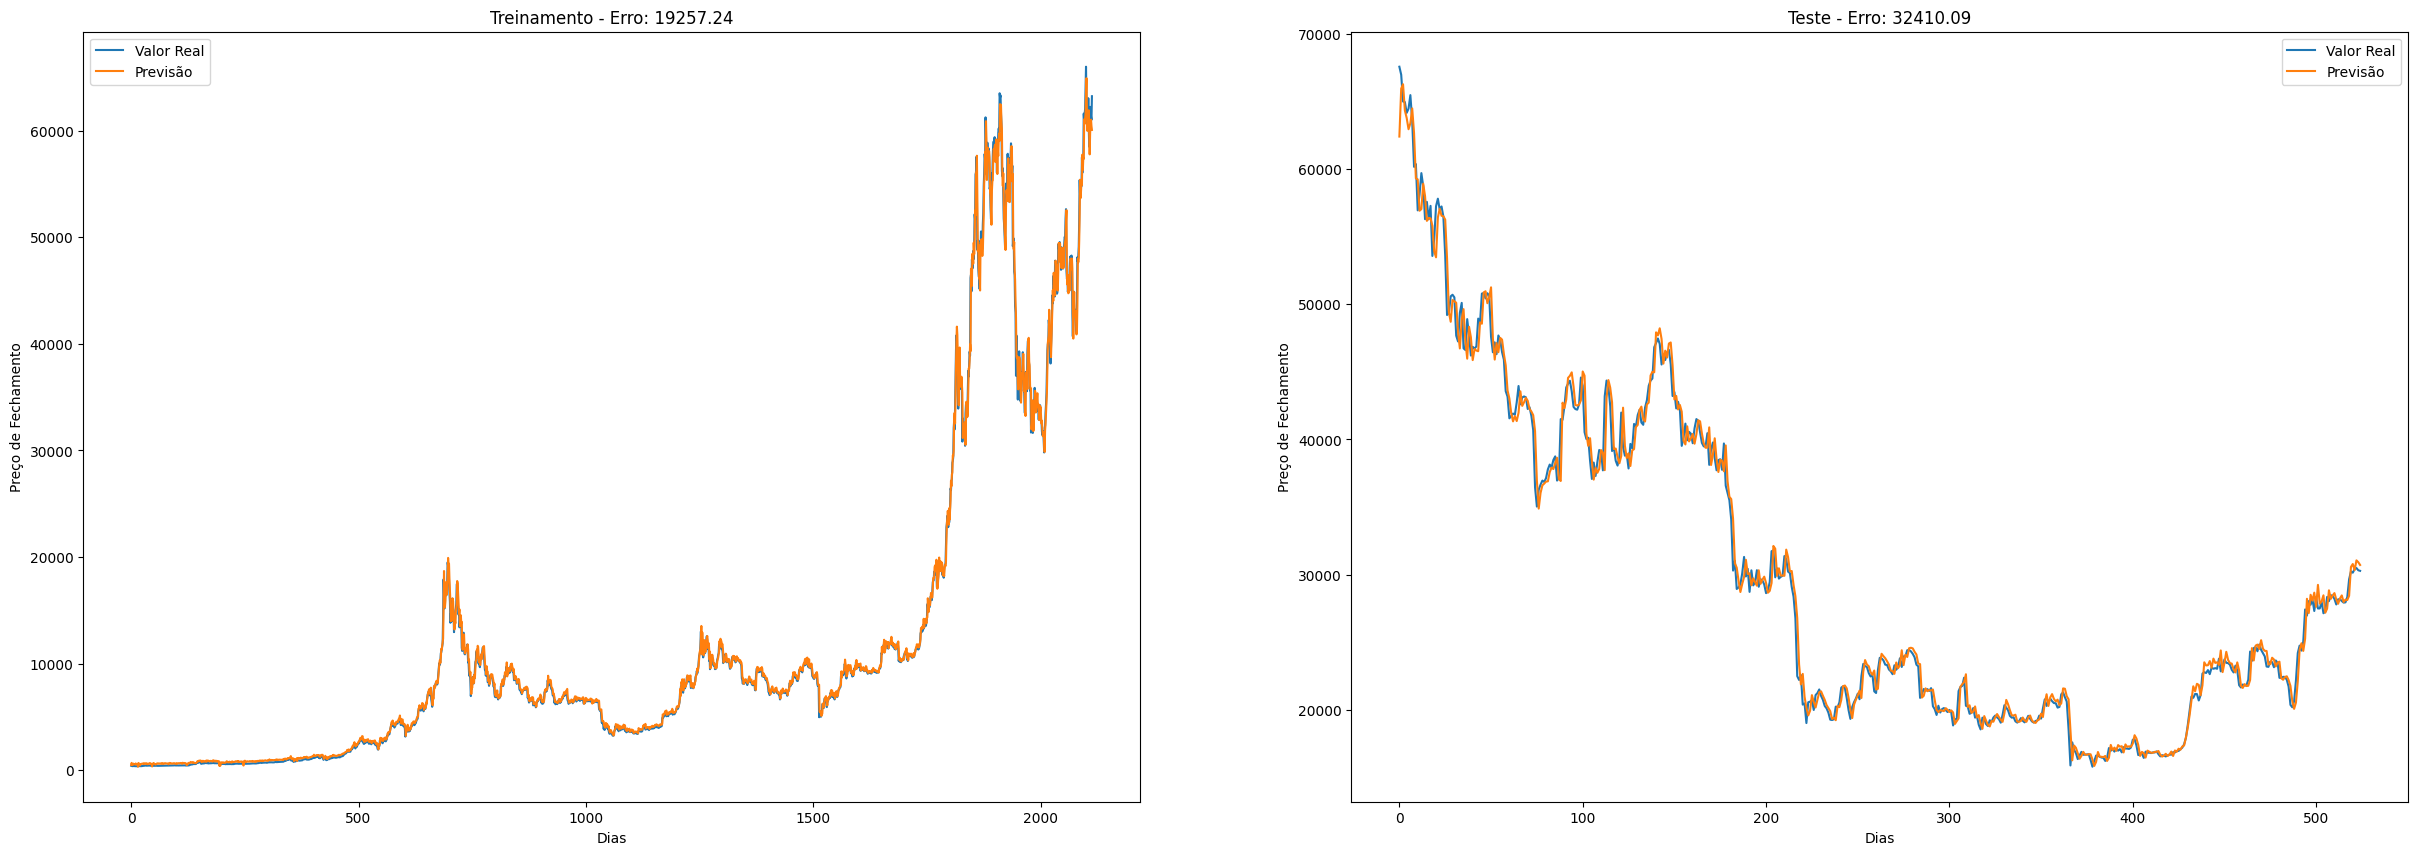

In [48]:
Y_train_real = scaler.inverse_transform(np.column_stack((Y_train, X_train[:, -1, 1])))
Y_test_real = scaler.inverse_transform(np.column_stack((Y_test, X_test[:, -1, 1])))
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(Y_train_real[:, 0], label='Valor Real')
plt.plot(train_predict[:, 0], label='Previsão')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento')
plt.title(f'Treinamento - Erro: {train_error:.2f}')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Y_test_real[:, 0], label='Valor Real')
plt.plot(test_predict[:, 0], label='Previsão')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento')
plt.title(f'Teste - Erro: {test_error:.2f}')
plt.legend()
plt.show()